In [ ]:
!pip install -U accelerate
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install py7zr
!pip install -U datasets

In [ ]:
from datasets import load_dataset
dataset = load_dataset('cnn_dailymail', "3.0.0")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [ ]:
dataset['train'][1]['highlights']

'Mentally ill inmates in Miami are housed on the "forgotten floor"\nJudge Steven Leifman says most are there as a result of "avoidable felonies"\nWhile CNN tours facility, patient shouts: "I am the son of the president"\nLeifman says the system is unjust and he\'s fighting for change .'

In [ ]:
from transformers import pipeline

In [ ]:
pipe = pipeline('text-generation', model = "gpt2-medium" )

Device set to use cuda:0


In [ ]:
dataset['train'][1]["article"][:2000]
input_text = dataset['train'][1]["article"][:2000]
query = input_text + "\nTL;DR:\n"
pipe_out = pipe(query, max_length = 512, clean_up_tokenization_spaces=True)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
pipe_out[0]['generated_text'][len(query):]


'"There\'s a problem with mentally ill persons here" -- Leifman'

In [ ]:
summaries = {}
summaries['gpt2-medium-380M'] = pipe_out[0]['generated_text'][len(query):]

In [ ]:
# T-5 transformers is used
pipe = pipeline('summarization', model ='t5-base')

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
pipe_out = pipe(input_text)

In [ ]:
summaries['t5-base-223M'] = pipe_out[0]['summary_text']

In [ ]:
# Using Bart by facebook
pipe = pipeline('summarization', model = 'facebook/bart-large-cnn')
pipe_out = pipe(input_text)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
summaries['bart-large-cnn-400M'] = pipe_out[0]['summary_text']

In [ ]:
# Using google transformers
pipe = pipeline('summarization', model = 'google/pegasus-cnn_dailymail')

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
pipe_out = pipe(input_text)

In [ ]:
summaries['pegasus-cnn-568M'] = pipe_out[0]['summary_text']

In [ ]:
for model in summaries :
    print(model.upper())
    print(summaries[model])
    print("")

GPT2-MEDIUM-380M
"There's a problem with mentally ill persons here" -- Leifman

T5-BASE-223M
mentally ill inmates housed on the "forgotten floor" of a pretrial detention facility in florida . inmates with the most severe mental illnesses are incarcerated until they're ready to appear . a judge says the arrests often result from confrontations with police . mentally ill people often won't do what police say, judge says .

BART-LARGE-CNN-400M
Mentally ill inmates are housed on the "forgotten floor" of Miami-Dade jail. Most often, they face drug charges or charges of assaulting an officer. Judge Steven Leifman says the arrests often result from confrontations with police. He says about one-third of all people in the county jails are mentally ill.

PEGASUS-CNN-568M
Mentally ill inmates in Miami are housed on the "forgotten floor"<n>The ninth floor is where they're held until they're ready to appear in court .<n>Most often, they face drug charges or charges of assaulting an officer .<n>They

In [ ]:
from datasets import load_dataset
from transformers import pipeline

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

In [ ]:
device = 'gpu'
model_ckpt = 'facebook/bart-large-cnn'
tokenizer =  AutoTokenizer.from_pretrained(model_ckpt)
model =  AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

In [ ]:
samsum = load_dataset('samsum')
samsum

README.md:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

samsum.py:   0%|          | 0.00/3.36k [00:00<?, ?B/s]

The repository for samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/samsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


corpus.7z:   0%|          | 0.00/2.94M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [ ]:
samsum['train'][0]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

In [ ]:
dialogue_len = [len(x['dialogue'].split()) for x in samsum['train']]
summary_len = [len(x['summary'].split()) for x in samsum['train']]

<ipython-input-23-5a0e6fc28f84>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.colums = ['Dialogue length', 'Summary_length']


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
      dtype=object)

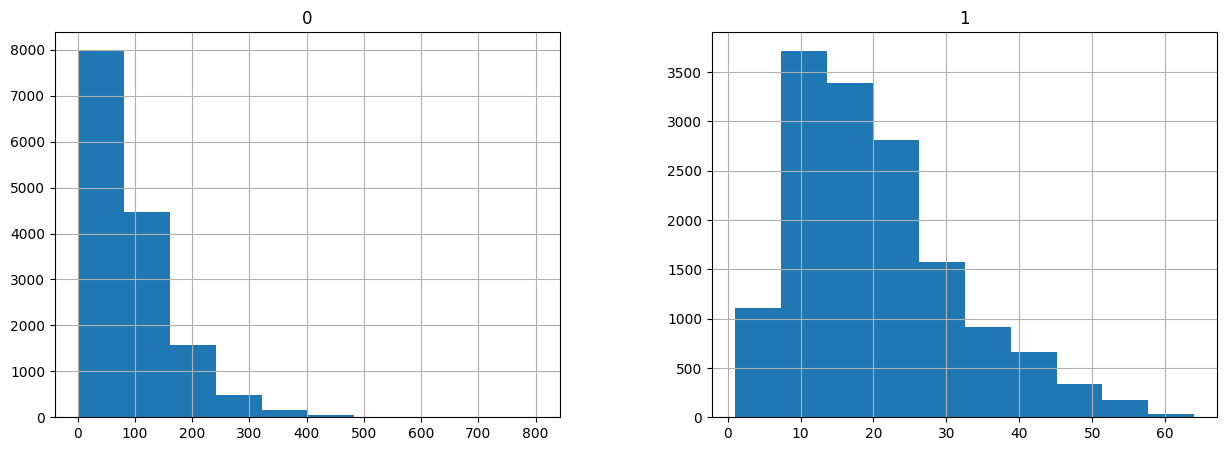

In [ ]:
import pandas as pd
data = pd.DataFrame([dialogue_len, summary_len]).T
data.colums = ['Dialogue length', 'Summary_length']
data.hist(figsize = (15,5))

In [ ]:
# lets build data collator

def get_feature(batch):

    encodings = tokenizer(batch['dialogue'],
                         text_target = batch['summary'],
                          max_length = 1024,
                          truncation = True)

    encodings = {'input_ids': encodings['input_ids'],
            'attention_mask': encodings['attention_mask'],
                     'labels': encodings['labels']
                }

    return encodings

In [ ]:
samsum_pt = samsum.map(get_feature, batched = True)
samsum_pt

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 818
    })
})

In [ ]:
columns = ['input_ids', 'labels', 'attention_mask']
samsum_pt.set_format(type = 'torch', columns = columns)

In [ ]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model = model)

In [ ]:
from transformers import TrainingArguments, Trainer
training_args = TrainingArguments(
                                 output_dir = 'bart_samsum',
                                 num_train_epochs=1,
                                 warmup_steps=500,
                                 per_device_train_batch_size=4,
                                 weight_decay=0.01,
                                 logging_steps=10,
                                 evaluation_strategy='steps',
                                 eval_steps=500,
                                 save_steps=1e6,
                                 gradient_accumulation_steps=16
                                 )

trainer = Trainer(model = model,
                  args = training_args,
                  tokenizer = tokenizer,
                  data_collator = data_collator,
                  train_dataset = samsum_pt['train'],
                  eval_dataset = samsum_pt['validation'])

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-28-669424aec9e2>:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model = model,


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


/usr/local/lib/python3.11/dist-packages/transformers/data/data_collator.py:657: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Step,Training Loss,Validation Loss


Step,Training Loss,Validation Loss


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:2817: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=230, training_loss=23.72869926120924, metrics={'train_runtime': 2026.2644, 'train_samples_per_second': 7.271, 'train_steps_per_second': 0.114, 'total_flos': 8823027777404928.0, 'train_loss': 23.72869926120924, 'epoch': 0.9991854466467553})

In [ ]:
trainer.save_model('Coder_one_2nd_project')

In [ ]:
# Custome dialogue prediction

pipe = pipeline('summarization', model = 'Coder_one_2nd_project')
gen_kwargs = {"length_penalty": 0.8,
                   "num_beams":8,
                  "max_length":128}
custome_dialogue = """
Aria, a curious girl, discovers the magical Enchanted Forest, home to mystical creatures and the wise dragon Eldrin. The forest faces
a threat from the evil sorcerer Malakar, who seeks to drain its magic. With the help of Eldrin, Aria embarks on a quest to find three
ancient relics to defeat Malakar. Along the way, she makes new friends and overcomes challenges. Aria ultimately defeats Malakar,
restoring the forest's magic.
The creatures celebrate her bravery, and Aria continues her adventures in the Enchanted Forest, filled with wonder and friendship.

"""

print(pipe(custome_dialogue, **gen_kwargs))

Device set to use cuda:0


[{'summary_text': "Aria discovers the magical Enchanted Forest, home to mystical creatures and the wise dragon Eldrin. With the help of Eldrin, Aria embarks on a quest to find three relics to defeat the evil sorcerer Malakar and restore the forest's magic."}]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')